# Qualitätskontrolle

Ist ein Programm erstmal geschrieben, vergisst man schnell die Details,
es ändern sich im Laufe der Zeit die darunterligenden Bibliotheken
und natürlich die Anwendungsfälle.
Besonders schwierig wird es dann,
später Fehler auszubessern oder bei nachträglichen Änderungen nicht neue Fehler einzubauen.

Ein wichtiges Hilfsmittel hierfür sind Tests zur Qualitätskontrolle.
Dabei handelt es sich um kleine Aufrufe der einzelnen Funktionen bzw. Methoden des Programms,
wobei die jeweiligen Rückgabewerte mit den zu erwartenden Ergebnissen verglichen werden.
Damit alle Tests passen, müssen alle Rückgaben exakt die zu erwartenden sein!

Ein Programm sollte auch möglichst vollständig durch solche Testaufrufe abgedeckt werden.
Das nennt sich [coverage](https://en.wikipedia.org/wiki/Code_coverage).

Siehe auch: [Python Tutorial/Qualitätskontrolle](https://docs.python.org/2/tutorial/stdlib.html#quality-control)

## Doctesting

In die Doumentationskommentare der Funktionen und Methoden werden
eingerückt durch `>>>` Anweisungen eingebaut und ausgeführt.
Darunter steht jeweils das zu erwartende Ergebnis.

Gibt es einen Unterschied, meldet dies der Test.

In [1]:
from __future__ import division

Berechnung des Mittelwerts mit einem Doctest:

In [2]:
def average(numbers):
    """
    Durchschnitt der übergebenen Liste von Zahlen
    
    >>> average([2, 10, 12])
    8.0

    >>> x = average([7,7,7,7,7,7,7,7,7,7,7,8])
    >>> 7.05 < x < 7.1
    True
    """
    return sum(numbers) / len(numbers)

In [3]:
import doctest
doctest.testmod()

TestResults(failed=0, attempted=3)

Berechnung des Medians, wobei leider im Algorithmus ein wichtiger Schritt vergessen wurde.
Daher passt dieser Test nicht!

In [4]:
def wrong_median(numbers):
    """
    Median der übergebenen Liste von Zahlen
    
    >>> wrong_median([5, 10, 1, 10, 2])
    5.0
    """
    i = len(numbers) // 2
    if len(numbers) % 2 == 0:
        return (numbers[i] + numbers[i+1]) / 2.
    return numbers[i]

In [5]:
doctest.testmod()

**********************************************************************
File "__main__", line 5, in __main__.wrong_median
Failed example:
    wrong_median([5, 10, 1, 10, 2])
Expected:
    5.0
Got:
    1
**********************************************************************
1 items had failures:
   1 of   1 in __main__.wrong_median
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=4)

## Unittests

Allgemeiner als Doctests sind **Unittests**.
Sie sind üblicherweise Teil eines komplexeren Frameworks,
um Teile des gesamten Programms zu testen.
Es gibt u.A. `setUp` und `tearDown` Routinen,
um vor und nach der Ausführen der eigentlichen Tests den Programmstatus passend einzustellen
(z.B. Datenbankverbindung herstellen, bevor Datenbankfunktionstests ausgeführt werden)

Im folgenden berechnet die Funktion `steuern(einkommen)` den progressiven Steuersatz für das Einkommen.
Die `ramp(...)` Funktion ist hierbei hilfreich, um sich langwierige Fallunterscheidungen und Zwischenrechnungen zu ersparen.

$$\operatorname{ramp}(x) := \begin{cases}
x & x \geq 0 \\
0 & \text{otherwise}
\end{cases}$$

In [6]:
# ramp function (x * heavyside)
ramp = lambda x : x if x >= 0. else 0.

def steuern(einkommen):
    s  = 0.
    s += 0.25 * ramp(min(20000, einkommen) - 11000)
    s += 0.35 * ramp(min(30000, einkommen) - 20000)
    s += 0.42 * ramp(min(60000, einkommen) - 30000)
    s += 0.48 * ramp(min(90000, einkommen) - 60000)
    s += 0.50 * ramp(min(1000000, einkommen) - 90000)
    s += 0.55 * ramp(einkommen - 1000000)
    return s        

In [7]:
steuern(1000)

0.0

In [8]:
steuern(10500)

0.0

In [9]:
steuern(11100)

25.0

In [10]:
steuern(25010)

4003.5

In [11]:
steuern(35000)

7850.0

In [12]:
steuern(100000)

37750.0

Hier nun die Definition von drei Tests -- als Teil eines `unittest.TestCase`s --
wobei einer fehlschlägt.

Man beachte, in der ersten Zeile der Ausgabe stehen die Punkte für die erfolgreich ausgeführten Tests,
während der dritte mit einem "F" einen Fehler signalisiert.

In [13]:
import unittest

In [14]:
class TestSteuern(unittest.TestCase):
    def test_1(self):
        assert steuern(1000) == 0.
    def test_2(self):
        assert steuern(25000) < 5000
    def test_3(self):
        assert(steuern(1000000) / 1000000) > .5

In [15]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestSteuern)
unittest.TextTestRunner().run(suite)

..F
FAIL: test_3 (__main__.TestSteuern)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-14-f9b81d5049ee>", line 7, in test_3
    assert(steuern(1000000) / 1000000) > .5
AssertionError

----------------------------------------------------------------------
Ran 3 tests in 0.004s

FAILED (failures=1)


<unittest.runner.TextTestResult run=3 errors=0 failures=1>

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

Der vollständigkeithalber, ein Plot für Einkommen von 0 bis 200000€.

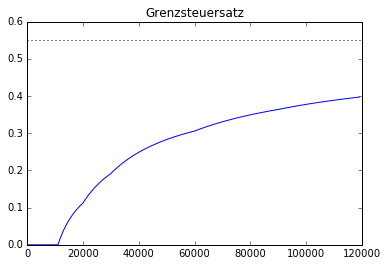

In [17]:
from __future__ import division
xx = range(1, 120000, 1000)
yy = [steuern(s)/s for s in xx]
plt.title("Grenzsteuersatz")
plt.ylim(0, 0.6)
plt.hlines(0.55, 0, 120000, linestyles="dotted")
plt.plot(xx, yy)